# Random Forest - Optimised 

### This script contains the following:
#### 1. Importing Libraries and Data
#### 2. Data Wrangling
#### 3. Reshaping
#### 4. Data Splitting 
#### 5. hyperparameter optimisation
#### 6. Optimised Random Forest Model
#### 7. Feature Importance
#### 8. Valentia


### 1. Importing Libraries and Data

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import time
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn import datasets  
from sklearn.ensemble import RandomForestClassifier
from numpy import argmax
from sklearn.model_selection import train_test_split
from sklearn import metrics  
from sklearn.tree import plot_tree
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV

import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", None)

In [8]:
path = r'C:\Users\mosh_\OneDrive\Desktop\Career Foundry\Machine Learning with Python\Achievement 2- Real-world appllication of Machine Learning\Data Sets'

In [10]:
path

'C:\\Users\\mosh_\\OneDrive\\Desktop\\Career Foundry\\Machine Learning with Python\\Achievement 2- Real-world appllication of Machine Learning\\Data Sets'

In [12]:
df = pd.read_csv(os.path.join(path, 'weather cleaned with date.csv'))
df

,Unnamed: 0,DATE,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max,BELGRADE_cloud_cover,BELGRADE_humidity,BELGRADE_pressure,BELGRADE_global_radiation,BELGRADE_precipitation,BELGRADE_sunshine,BELGRADE_temp_mean,BELGRADE_temp_min,BELGRADE_temp_max,BUDAPEST_cloud_cover,BUDAPEST_humidity,BUDAPEST_pressure,BUDAPEST_global_radiation,BUDAPEST_precipitation,BUDAPEST_sunshine,BUDAPEST_temp_mean,BUDAPEST_temp_min,BUDAPEST_temp_max,DEBILT_cloud_cover,DEBILT_humidity,DEBILT_pressure,DEBILT_global_radiation,DEBILT_precipitation,DEBILT_sunshine,DEBILT_temp_mean,DEBILT_temp_min,DEBILT_temp_max,DUSSELDORF_cloud_cover,DUSSELDORF_humidity,DUSSELDORF_pressure,DUSSELDORF_global_radiation,DUSSELDORF_precipitation,DUSSELDORF_sunshine,DUSSELDORF_temp_mean,DUSSELDORF_temp_min,DUSSELDORF_temp_max,HEATHROW_cloud_cover,HEATHROW_humidity,HEATHROW_pressure,HEATHROW_global_radiation,HEATHROW_precipitation,HEATHROW_sunshine,HEATHROW_temp_mean,HEATHROW_temp_min,KASSEL_cloud_cover,HEATHROW_temp_max,KASSEL_humidity,KASSEL_pressure,KASSEL_global_radiation,KASSEL_precipitation,KASSEL_sunshine,KASSEL_temp_mean,KASSEL_temp_min,KASSEL_temp_max,LJUBLJANA_cloud_cover,LJUBLJANA_humidity,LJUBLJANA_pressure,LJUBLJANA_global_radiation,LJUBLJANA_precipitation,LJUBLJANA_sunshine,LJUBLJANA_temp_mean,LJUBLJANA_temp_min,LJUBLJANA_temp_max,MAASTRICHT_cloud_cover,MAASTRICHT_humidity,MAASTRICHT_pressure,MAASTRICHT_global_radiation,MAASTRICHT_precipitation,MAASTRICHT_sunshine,MAASTRICHT_temp_mean,MAASTRICHT_temp_min,MAASTRICHT_temp_max,MADRID_cloud_cover,MADRID_humidity,MADRID_pressure,MADRID_global_radiation,MADRID_precipitation,MADRID_sunshine,MADRID_temp_mean,MADRID_temp_min,MADRID_temp_max,MUNCHENB_cloud_cover,MUNCHENB_pressure,MUNCHENB_humidity,MUNCHENB_global_radiation,MUNCHENB_precipitation,MUNCHENB_sunshine,MUNCHENB_temp_mean,MUNCHENB_temp_min,MUNCHENB_temp_max,OSLO_cloud_cover,OSLO_humidity,OSLO_pressure,OSLO_global_radiation,OSLO_precipitation,OSLO_sunshine,OSLO_temp_mean,OSLO_temp_min,OSLO_temp_max,SONNBLICK_cloud_cover,SONNBLICK_humidity,SONNBLICK_pressure,SONNBLICK_global_radiation,SONNBLICK_precipitation,SONNBLICK_sunshine,SONNBLICK_temp_mean,SONNBLICK_temp_min,SONNBLICK_temp_max,STOCKHOLM_humidity,STOCKHOLM_cloud_cover,STOCKHOLM_pressure,STOCKHOLM_global_radiation,STOCKHOLM_precipitation,STOCKHOLM_sunshine,STOCKHOLM_temp_mean,STOCKHOLM_temp_min,STOCKHOLM_temp_max,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,0,19600101,7,0.85,1.0180,0.32,0.09,0.7,6.5,0.8,10.9,1,0.81,1.0195,0.88,0.00,7.0,3.7,-0.9,7.9,4,0.67,1.017,0.44,0.01,2.3,2.4,-0.4,5.1,7,0.85,1.0032,0.07,0.25,0.0,9.3,7.4,11.0,8,0.83,1.0161,0.12,0.08,0.0,10.0,7.0,11.5,7,0.91,1.0010,0.13,0.22,0.0,10.6,9.4,8,8.3,0.82,1.0094,0.28,0.48,1.6,7.9,3.9,9.4,8,1.00,1.0173,0.20,0.00,0.0,-0.6,-1.9,0.5,7,0.83,1.0063,0.22,0.32,1.0,9.5,8.5,11.1,6,0.92,1.0260,0.53,0.00,1.4,7.6,4.4,10.8,5,1.0180,0.67,0.20,0.10,0.0,6.9,1.1,10.4,8,0.98,0.9978,0.04,1.14,0.0,4.9,3.8,5.9,4,0.73,1.0304,0.48,0.01,2.3,-5.9,-8.5,-3.2,0.98,5,1.0114,0.05,0.32,0.0,4.2,2.2,4.9,5,0.88,1.0003,0.45,0.34,4.7,8.5,6.0,10.9
1,1,19600102,6,0.84,1.0180,0.36,1.05,1.1,6.1,3.3,10.1,6,0.84,1.0172,0.25,0.00,0.0,2.9,2.2,4.4,4,0.67,1.017,0.18,0.31,0.0,2.3,1.4,3.1,8,0.90,1.0056,0.14,0.06,0.1,7.7,6.4,8.3,8,0.89,1.0161,0.18,0.66,0.5,8.2,7.4,11.0,7,0.98,1.0051,0.13,0.23,0.0,6.1,3.9,8,10.6,0.86,1.0086,0.12,0.27,0.0,7.7,6.8,9.1,6,0.94,1.0173,0.56,0.13,3.2,2.1,-1.3,5.5,8,0.92,1.0062,0.17,1.34,0.4,8.6,7.5,9.9,7,0.86,1.0254,0.46,0.00,0.9,9.8,7.4,12.2,6,1.0180,0.72,0.61,0.30,5.1,6.2,4.2,10.2,8,0.62,1.0139,0.04,0.00,0.0,3.4,2.8,4.9,6,0.97,1.0292,0.21,0.61,0.0,-9.5,-10.5,-8.5,0.62,5,1.0114,0.05,0.06,0.0,4.0,3.0,5.0,7,0.91,1.0007,0.25,0.84,0.7,8.9,5.6,12.1
2,2,19600103,8,0.90,1.0180,0.18,0.30,0.0,8.5,5.1,9.9,6,0.77,1.0179,0.67,0.00,3.5,3.1,-0.5,6.4,4,0.67,

In [14]:
pleasant = pd.read_csv(os.path.join(path, 'Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv'))
pleasant

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,19600101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,19600102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,19600103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,19600104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,19600105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22945,20221027,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22946,20221028,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22947,20221029,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22948,20221030,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### 2. Data Wrangling

Reducing the dataset down to just 1 year - 2010

In [18]:
df2010 = df[df['DATE'].astype(str).str.startswith('201')] 
df2010.head()

,Unnamed: 0,DATE,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max,BELGRADE_cloud_cover,BELGRADE_humidity,BELGRADE_pressure,BELGRADE_global_radiation,BELGRADE_precipitation,BELGRADE_sunshine,BELGRADE_temp_mean,BELGRADE_temp_min,BELGRADE_temp_max,BUDAPEST_cloud_cover,BUDAPEST_humidity,BUDAPEST_pressure,BUDAPEST_global_radiation,BUDAPEST_precipitation,BUDAPEST_sunshine,BUDAPEST_temp_mean,BUDAPEST_temp_min,BUDAPEST_temp_max,DEBILT_cloud_cover,DEBILT_humidity,DEBILT_pressure,DEBILT_global_radiation,DEBILT_precipitation,DEBILT_sunshine,DEBILT_temp_mean,DEBILT_temp_min,DEBILT_temp_max,DUSSELDORF_cloud_cover,DUSSELDORF_humidity,DUSSELDORF_pressure,DUSSELDORF_global_radiation,DUSSELDORF_precipitation,DUSSELDORF_sunshine,DUSSELDORF_temp_mean,DUSSELDORF_temp_min,DUSSELDORF_temp_max,HEATHROW_cloud_cover,HEATHROW_humidity,HEATHROW_pressure,HEATHROW_global_radiation,HEATHROW_precipitation,HEATHROW_sunshine,HEATHROW_temp_mean,HEATHROW_temp_min,KASSEL_cloud_cover,HEATHROW_temp_max,KASSEL_humidity,KASSEL_pressure,KASSEL_global_radiation,KASSEL_precipitation,KASSEL_sunshine,KASSEL_temp_mean,KASSEL_temp_min,KASSEL_temp_max,LJUBLJANA_cloud_cover,LJUBLJANA_humidity,LJUBLJANA_pressure,LJUBLJANA_global_radiation,LJUBLJANA_precipitation,LJUBLJANA_sunshine,LJUBLJANA_temp_mean,LJUBLJANA_temp_min,LJUBLJANA_temp_max,MAASTRICHT_cloud_cover,MAASTRICHT_humidity,MAASTRICHT_pressure,MAASTRICHT_global_radiation,MAASTRICHT_precipitation,MAASTRICHT_sunshine,MAASTRICHT_temp_mean,MAASTRICHT_temp_min,MAASTRICHT_temp_max,MADRID_cloud_cover,MADRID_humidity,MADRID_pressure,MADRID_global_radiation,MADRID_precipitation,MADRID_sunshine,MADRID_temp_mean,MADRID_temp_min,MADRID_temp_max,MUNCHENB_cloud_cover,MUNCHENB_pressure,MUNCHENB_humidity,MUNCHENB_global_radiation,MUNCHENB_precipitation,MUNCHENB_sunshine,MUNCHENB_temp_mean,MUNCHENB_temp_min,MUNCHENB_temp_max,OSLO_cloud_cover,OSLO_humidity,OSLO_pressure,OSLO_global_radiation,OSLO_precipitation,OSLO_sunshine,OSLO_temp_mean,OSLO_temp_min,OSLO_temp_max,SONNBLICK_cloud_cover,SONNBLICK_humidity,SONNBLICK_pressure,SONNBLICK_global_radiation,SONNBLICK_precipitation,SONNBLICK_sunshine,SONNBLICK_temp_mean,SONNBLICK_temp_min,SONNBLICK_temp_max,STOCKHOLM_humidity,STOCKHOLM_cloud_cover,STOCKHOLM_pressure,STOCKHOLM_global_radiation,STOCKHOLM_precipitation,STOCKHOLM_sunshine,STOCKHOLM_temp_mean,STOCKHOLM_temp_min,STOCKHOLM_temp_max,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
18263,18263,20100101,8,0.93,0.9965,0.18,0.56,0.0,2.9,-0.2,4.8,6,0.85,0.9912,0.64,2.63,3.2,9.9,8.4,13.4,6,0.67,1.017,0.31,0.00,0.7,5.0,3.6,7.8,4,0.78,1.0026,0.37,0.00,4.2,-1.6,-6.3,0.7,8,0.89,0.9997,0.12,0.02,0.0,-1.1,-2.8,-0.6,2,0.77,1.0056,0.49,0.00,6.4,1.6,-0.5,8,5.0,0.93,0.9981,0.12,0.20,0.0,-2.6,-3.0,-1.8,8,0.97,0.9926,0.12,0.46,0.0,6.9,5.5,7.7,7,0.91,1.0008,0.12,0.01,0.0,-2.0,-6.1,-1.1,5,0.82,1.0107,0.46,0.01,2.8,5.6,3.6,7.6,7,0.9965,0.91,0.20,0.43,0.0,3.1,0.1,4.9,7,0.76,1.0110,0.04,0.24,0.0,-7.7,-8.9,-4.9,4,0.89,1.0054,0.66,0.56,5.6,-9.7,-11.5,-7.9,0.76,6,1.0068,0.12,0.07,1.5,-7.6,-8.8,-7.0,1,0.80,1.0121,0.43,0.00,6.0,1.7,-1.6,5.0
18264,18264,20100102,3,0.74,1.0193,0.58,0.00,5.2,-1.5,-4.2,0.4,8,0.92,0.9995,0.25,0.74,0.0,3.5,0.7,8.4,7,0.67,1.017,0.38,0.01,1.4,1.6,0.1,5.8,8,0.91,1.0140,0.14,0.01,0.0,-1.1,-6.4,1.2,7,0.88,1.0152,0.26,0.45,1.6,-1.5,-5.8,0.6,4,0.82,1.0155,0.48,0.00,5.9,1.3,-2.4,7,3.0,0.87,1.0146,0.31,0.10,2.0,-3.7,-4.8,-2.5,8,0.94,1.0066,0.20,0.79,0.0,2.5,0.7,6.7,7,0.90,1.0161,0.30,0.02,2.7,-2.1,-6.7,0.2,7,0.81,1.0205,0.42,0.00,0.3,5.0,2.6,7.5,6,1.0193,0.86,0.31,0.07,0.6,-2.5,-5.3,0.1,3,0.74,1.0233,0.12,0.00,2.3,-11.0,-13.8,-7.9,8,0.84,1.0250,0.32,1.23,0.0,-17.0,-23.1,-10.9,0.74,7,1.0189,0.10,0.07,0.7,-8.9,-11.1,-7.1,1,0.82,1.0196,0.45,0.00,6.0,0.8,-4.5,6.2
18265,18265,20100103,3,0.75,1.0226,0.61,0.00,6.3,-3.2,-6.

In [20]:
df2010.shape

(3652, 137)

In [22]:
pleasant2010 = pleasant[pleasant['DATE'].astype(str).str.startswith('201')] 
pleasant2010.head()

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
18263,20100101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18264,20100102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18265,20100103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18266,20100104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18267,20100105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [24]:
pleasant2010.shape

(3652, 16)

In [26]:
# dropping the DATE column
df2010 = df2010.drop(columns=['DATE','Unnamed: 0'])
df2010

,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max,BELGRADE_cloud_cover,BELGRADE_humidity,BELGRADE_pressure,BELGRADE_global_radiation,BELGRADE_precipitation,BELGRADE_sunshine,BELGRADE_temp_mean,BELGRADE_temp_min,BELGRADE_temp_max,BUDAPEST_cloud_cover,BUDAPEST_humidity,BUDAPEST_pressure,BUDAPEST_global_radiation,BUDAPEST_precipitation,BUDAPEST_sunshine,BUDAPEST_temp_mean,BUDAPEST_temp_min,BUDAPEST_temp_max,DEBILT_cloud_cover,DEBILT_humidity,DEBILT_pressure,DEBILT_global_radiation,DEBILT_precipitation,DEBILT_sunshine,DEBILT_temp_mean,DEBILT_temp_min,DEBILT_temp_max,DUSSELDORF_cloud_cover,DUSSELDORF_humidity,DUSSELDORF_pressure,DUSSELDORF_global_radiation,DUSSELDORF_precipitation,DUSSELDORF_sunshine,DUSSELDORF_temp_mean,DUSSELDORF_temp_min,DUSSELDORF_temp_max,HEATHROW_cloud_cover,HEATHROW_humidity,HEATHROW_pressure,HEATHROW_global_radiation,HEATHROW_precipitation,HEATHROW_sunshine,HEATHROW_temp_mean,HEATHROW_temp_min,KASSEL_cloud_cover,HEATHROW_temp_max,KASSEL_humidity,KASSEL_pressure,KASSEL_global_radiation,KASSEL_precipitation,KASSEL_sunshine,KASSEL_temp_mean,KASSEL_temp_min,KASSEL_temp_max,LJUBLJANA_cloud_cover,LJUBLJANA_humidity,LJUBLJANA_pressure,LJUBLJANA_global_radiation,LJUBLJANA_precipitation,LJUBLJANA_sunshine,LJUBLJANA_temp_mean,LJUBLJANA_temp_min,LJUBLJANA_temp_max,MAASTRICHT_cloud_cover,MAASTRICHT_humidity,MAASTRICHT_pressure,MAASTRICHT_global_radiation,MAASTRICHT_precipitation,MAASTRICHT_sunshine,MAASTRICHT_temp_mean,MAASTRICHT_temp_min,MAASTRICHT_temp_max,MADRID_cloud_cover,MADRID_humidity,MADRID_pressure,MADRID_global_radiation,MADRID_precipitation,MADRID_sunshine,MADRID_temp_mean,MADRID_temp_min,MADRID_temp_max,MUNCHENB_cloud_cover,MUNCHENB_pressure,MUNCHENB_humidity,MUNCHENB_global_radiation,MUNCHENB_precipitation,MUNCHENB_sunshine,MUNCHENB_temp_mean,MUNCHENB_temp_min,MUNCHENB_temp_max,OSLO_cloud_cover,OSLO_humidity,OSLO_pressure,OSLO_global_radiation,OSLO_precipitation,OSLO_sunshine,OSLO_temp_mean,OSLO_temp_min,OSLO_temp_max,SONNBLICK_cloud_cover,SONNBLICK_humidity,SONNBLICK_pressure,SONNBLICK_global_radiation,SONNBLICK_precipitation,SONNBLICK_sunshine,SONNBLICK_temp_mean,SONNBLICK_temp_min,SONNBLICK_temp_max,STOCKHOLM_humidity,STOCKHOLM_cloud_cover,STOCKHOLM_pressure,STOCKHOLM_global_radiation,STOCKHOLM_precipitation,STOCKHOLM_sunshine,STOCKHOLM_temp_mean,STOCKHOLM_temp_min,STOCKHOLM_temp_max,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
18263,8,0.93,0.9965,0.18,0.56,0.0,2.9,-0.2,4.8,6,0.85,0.9912,0.64,2.63,3.2,9.9,8.4,13.4,6,0.67,1.017,0.31,0.00,0.7,5.0,3.6,7.8,4,0.78,1.0026,0.37,0.00,4.2,-1.6,-6.3,0.7,8,0.89,0.9997,0.12,0.02,0.0,-1.1,-2.8,-0.6,2,0.77,1.0056,0.49,0.00,6.4,1.6,-0.5,8,5.0,0.93,0.9981,0.12,0.20,0.0,-2.6,-3.0,-1.8,8,0.97,0.9926,0.12,0.46,0.0,6.9,5.5,7.7,7,0.91,1.0008,0.12,0.01,0.0,-2.0,-6.1,-1.1,5,0.82,1.0107,0.46,0.01,2.8,5.6,3.6,7.6,7,0.9965,0.91,0.20,0.43,0.0,3.1,0.1,4.9,7,0.76,1.0110,0.04,0.24,0.0,-7.7,-8.9,-4.9,4,0.89,1.0054,0.66,0.56,5.6,-9.7,-11.5,-7.9,0.76,6,1.0068,0.12,0.07,1.5,-7.6,-8.8,-7.0,1,0.80,1.0121,0.43,0.00,6.0,1.7,-1.6,5.0
18264,3,0.74,1.0193,0.58,0.00,5.2,-1.5,-4.2,0.4,8,0.92,0.9995,0.25,0.74,0.0,3.5,0.7,8.4,7,0.67,1.017,0.38,0.01,1.4,1.6,0.1,5.8,8,0.91,1.0140,0.14,0.01,0.0,-1.1,-6.4,1.2,7,0.88,1.0152,0.26,0.45,1.6,-1.5,-5.8,0.6,4,0.82,1.0155,0.48,0.00,5.9,1.3,-2.4,7,3.0,0.87,1.0146,0.31,0.10,2.0,-3.7,-4.8,-2.5,8,0.94,1.0066,0.20,0.79,0.0,2.5,0.7,6.7,7,0.90,1.0161,0.30,0.02,2.7,-2.1,-6.7,0.2,7,0.81,1.0205,0.42,0.00,0.3,5.0,2.6,7.5,6,1.0193,0.86,0.31,0.07,0.6,-2.5,-5.3,0.1,3,0.74,1.0233,0.12,0.00,2.3,-11.0,-13.8,-7.9,8,0.84,1.0250,0.32,1.23,0.0,-17.0,-23.1,-10.9,0.74,7,1.0189,0.10,0.07,0.7,-8.9,-11.1,-7.1,1,0.82,1.0196,0.45,0.00,6.0,0.8,-4.5,6.2
18265,3,0.75,1.0226,0.61,0.00,6.3,-3.2,-6.0,1.1,7,0.82,1.0156,0.25,0.12,0.0,-0.6,-1.2,0.7,6,0.67,1.017,

In [28]:
# dropping the DATE column

pleasant2010 = pleasant2010.drop(columns=['DATE'])
pleasant2010

,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
18263,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18264,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18265,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18266,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18267,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21910,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
21911,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
21912,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
21913,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [30]:
# Extract stations list

stations = [col.split('_')[0] for col in df2010.columns if '_' in col]

In [32]:
# Create a set of unique station names

unique_stations = set(stations)
unique_stations

{'BASEL',
 'BELGRADE',
 'BUDAPEST',
 'DEBILT',
 'DUSSELDORF',
 'HEATHROW',
 'KASSEL',
 'LJUBLJANA',
 'MAASTRICHT',
 'MADRID',
 'MUNCHENB',
 'OSLO',
 'SONNBLICK',
 'STOCKHOLM',
 'VALENTIA'}

In [34]:
# Create a dictionary to store the frequency of entries for each station
station_frequencies = {}

for station in unique_stations:
    # Select columns that belong to the current station
    station_columns = [col for col in  df2010.columns if col.startswith(station)]
    
    # Count non-missing entries across all columns for the station
    station_frequencies[station] =  df2010[station_columns].notna().sum().sum()

# Print the frequency of entries for each station
print("Frequency of entries for each weather station:")
for station, freq in station_frequencies.items():
    print(f"{station}: {freq} entries")

Frequency of entries for each weather station:
VALENTIA: 32868 entries
DUSSELDORF: 32868 entries
OSLO: 32868 entries
MAASTRICHT: 32868 entries
SONNBLICK: 32868 entries
MADRID: 32868 entries
LJUBLJANA: 32868 entries
DEBILT: 32868 entries
MUNCHENB: 32868 entries
BASEL: 32868 entries
STOCKHOLM: 32868 entries
BELGRADE: 32868 entries
BUDAPEST: 32868 entries
KASSEL: 32868 entries
HEATHROW: 32868 entries


Each station has the same number of entries

### 3. Reshaping 

In [38]:
X = df2010

In [40]:
y = pleasant2010

In [42]:
# Turn X and y from a df to arrays

X = np.array(X)
y = np.array(y)

In [44]:
X.shape

(3652, 135)

In [46]:
y.shape

(3652, 15)

### 4. Data Splitting 

In [49]:
# Split data into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 42)

In [51]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(2739, 135) (2739, 15)
(913, 135) (913, 15)


### 5. hyperparameter optimisation

#### Grid Search

In [57]:
# Create a RF classifier

clf = RandomForestClassifier()

In [59]:
# Grid search cv
grid_space={'max_depth':[3,5,10,None],
              'n_estimators':[10,100,200],
              'max_features':[15, 50, 100, 135], 
              'min_samples_leaf':[1,2,3],
              'min_samples_split':[1,2,3]
           }

In [61]:
start = time.time()
grid = GridSearchCV(clf, param_grid=grid_space, cv=3, scoring='accuracy', verbose=3, n_jobs=-1)
model_grid = grid.fit(X_train, y_train)
print('Search took %s minutes' % ((time.time() - start)/60))

Fitting 3 folds for each of 432 candidates, totalling 1296 fits
Search took 26.231690828005473 minutes


In [63]:
# Print grid search results

print('Best GRID search hyperparameters are: '+str(model_grid.best_params_))
print('Best GRID search score is: '+str(model_grid.best_score_))

Best GRID search hyperparameters are: {'max_depth': None, 'max_features': 50, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best GRID search score is: 0.646951442132165


#### Random Search

In [67]:
# Define random search cv

rs_space={'max_depth':list(np.arange(10, 100, step=10)) + [None],
              'n_estimators':np.arange(10, 500, step=50),
              'max_features':randint(15, 135),
              'criterion':['gini','entropy'],
              'min_samples_leaf':randint(1,4),
              'min_samples_split':np.arange(2, 10, step=2)
         }

In [69]:
# Print grid search results

print('Best GRID search hyperparameters are: '+str(model_grid.best_params_))
print('Best GRID search score is: '+str(model_grid.best_score_))

Best GRID search hyperparameters are: {'max_depth': None, 'max_features': 50, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best GRID search score is: 0.646951442132165


In [71]:
# Create a RF classifier

clf2= RandomForestClassifier()

In [73]:
start = time.time()
rf_random = RandomizedSearchCV(clf2, rs_space, n_iter=10, scoring='accuracy', verbose=3, n_jobs=-1, cv=3)
model_random = rf_random.fit(X_train, y_train)
print('Search took %s minutes' % ((time.time() - start)/60))

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Search took 6.2355366230010985 minutes


In [75]:
# Random random search results

print('Best RANDOM search hyperparameters are: '+str(model_random.best_params_))
print('Best RANDOM search score is: '+str(model_random.best_score_))

Best RANDOM search hyperparameters are: {'criterion': 'gini', 'max_depth': 80, 'max_features': 72, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 460}
Best RANDOM search score is: 0.6349032493610807


In [77]:
# Grid search results vs.

print('Best GRID search hyperparameters are: '+str(model_grid.best_params_))
print('Best GRID search score is: '+str(model_grid.best_score_))

# Random random search results

print('Best RANDOM search hyperparameters are: '+str(model_random.best_params_))
print('Best RANDOM search score is: '+str(model_random.best_score_))


Best GRID search hyperparameters are: {'max_depth': None, 'max_features': 50, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best GRID search score is: 0.646951442132165
Best RANDOM search hyperparameters are: {'criterion': 'gini', 'max_depth': 80, 'max_features': 72, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 460}
Best RANDOM search score is: 0.6349032493610807


### 6. Optimised Random Forest Model

In [80]:
# Create a RF classifier with the best results from above
clf3 = RandomForestClassifier(n_estimators = 200, max_depth=None, max_features=50, min_samples_leaf=1, min_samples_split=2)  
  
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf3.fit(X_train, y_train)

RandomForestClassifier(max_features=50, n_estimators=200)

In [81]:
# Perform predictions on the test dataset
y_pred = clf3.predict(X_test)
  
# Use metrics module for accuracy calculation
print("Model Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Model Accuracy:  0.660460021905805


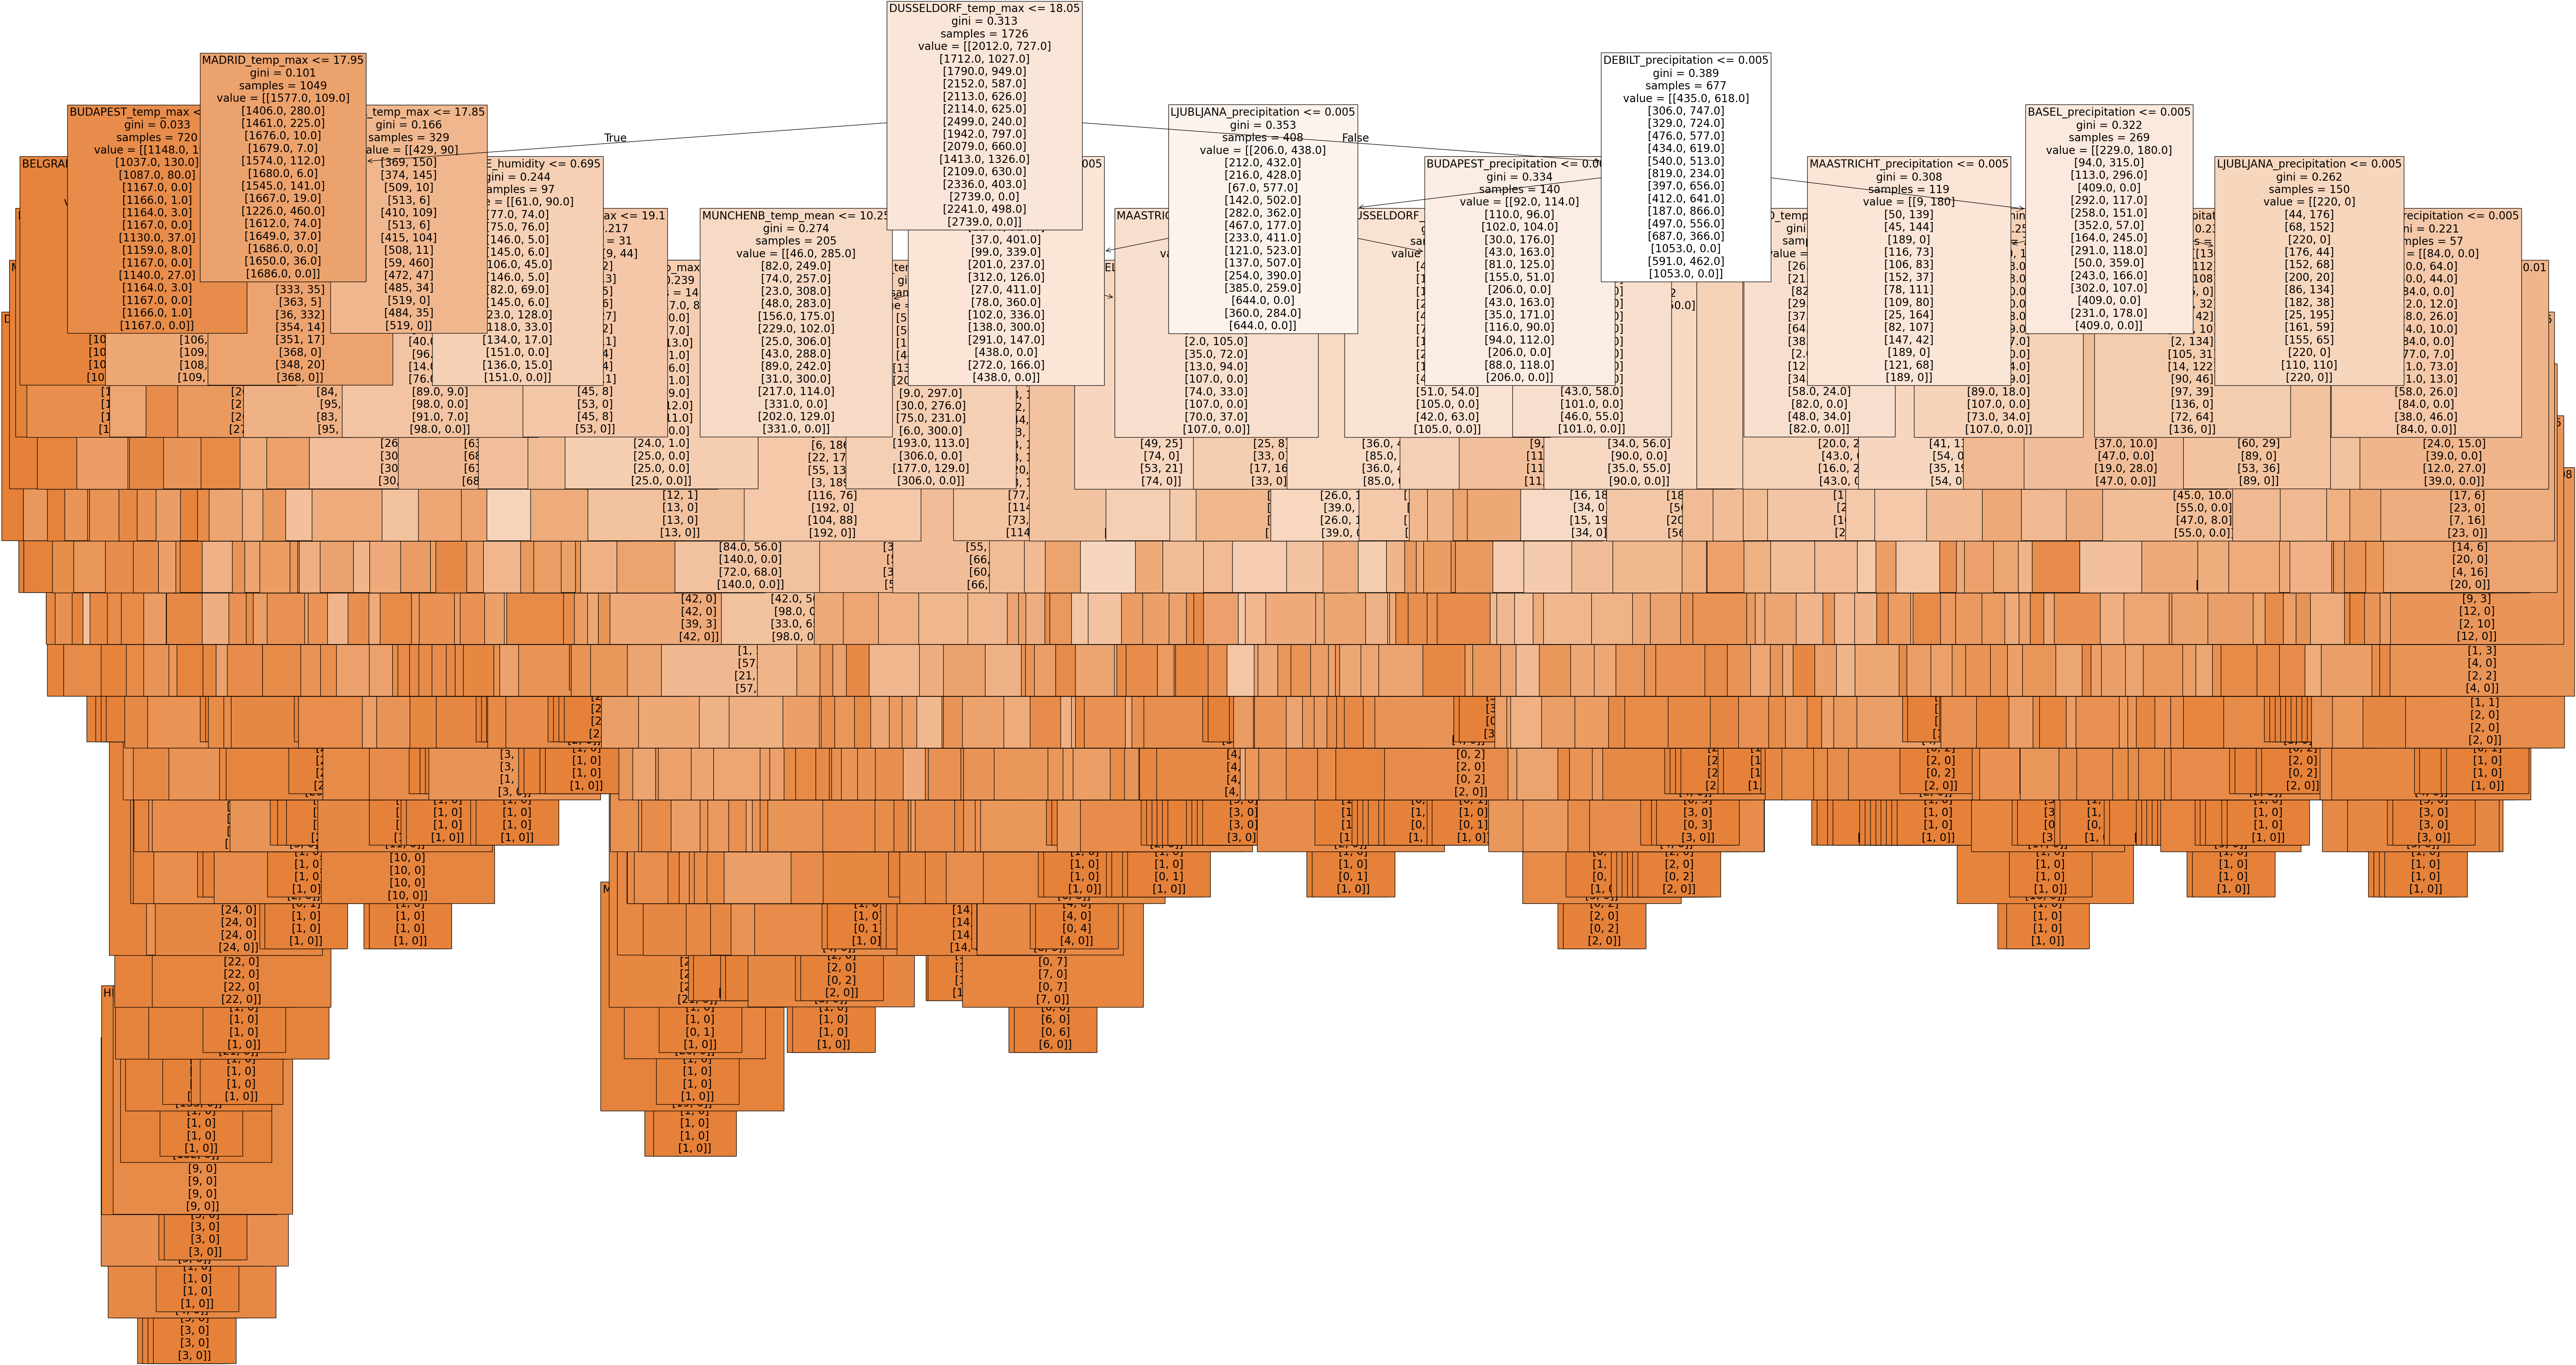

In [86]:
fig = plt.figure(figsize=(80,40))
plot_tree(clf3.estimators_[15], fontsize = 20, feature_names = df2010.columns, class_names=['unpleasant', 'pleasant'], filled=True);

### 7. Feature Importance

In [89]:
# Retrieve feature importances from the trained model

newarray = clf3.feature_importances_
print(clf3.feature_importances_.shape)
newarray

(135,)


array([1.73280708e-03, 2.60726605e-03, 2.27526444e-03, 2.34497669e-03,
       2.80671311e-02, 4.94343720e-03, 1.27558307e-02, 2.03236384e-03,
       8.22822044e-02, 3.10931602e-03, 2.44745383e-03, 2.24905720e-03,
       2.23116509e-03, 2.64026543e-02, 2.27469942e-03, 3.61292004e-03,
       2.16846264e-03, 8.67652806e-03, 3.04148849e-04, 0.00000000e+00,
       0.00000000e+00, 8.94239472e-04, 2.49034498e-02, 8.06014573e-04,
       8.41926725e-03, 2.17471427e-03, 1.69934849e-02, 1.35255999e-03,
       1.95269929e-03, 2.24503692e-03, 2.40615747e-03, 2.01749278e-02,
       2.62414360e-03, 3.83820758e-03, 1.93496343e-03, 3.72768011e-02,
       1.30763369e-03, 1.91834462e-03, 2.24346828e-03, 2.19221659e-03,
       3.75421191e-02, 3.09989127e-03, 1.32407031e-02, 1.86680648e-03,
       8.90584287e-02, 2.11286928e-03, 3.33559949e-03, 2.36413865e-03,
       3.24022643e-03, 1.36795232e-02, 3.72428566e-03, 2.92402393e-03,
       2.06432886e-03, 1.30736495e-03, 9.33357481e-03, 1.70058972e-03,
      

In [36]:
np.set_printoptions(threshold=1000)

In [91]:
# Reshape newarray

newarray = newarray.reshape(-1,15,9)
print(newarray.shape)
newarray

(1, 15, 9)


array([[[1.73280708e-03, 2.60726605e-03, 2.27526444e-03, 2.34497669e-03,
         2.80671311e-02, 4.94343720e-03, 1.27558307e-02, 2.03236384e-03,
         8.22822044e-02],
        [3.10931602e-03, 2.44745383e-03, 2.24905720e-03, 2.23116509e-03,
         2.64026543e-02, 2.27469942e-03, 3.61292004e-03, 2.16846264e-03,
         8.67652806e-03],
        [3.04148849e-04, 0.00000000e+00, 0.00000000e+00, 8.94239472e-04,
         2.49034498e-02, 8.06014573e-04, 8.41926725e-03, 2.17471427e-03,
         1.69934849e-02],
        [1.35255999e-03, 1.95269929e-03, 2.24503692e-03, 2.40615747e-03,
         2.01749278e-02, 2.62414360e-03, 3.83820758e-03, 1.93496343e-03,
         3.72768011e-02],
        [1.30763369e-03, 1.91834462e-03, 2.24346828e-03, 2.19221659e-03,
         3.75421191e-02, 3.09989127e-03, 1.32407031e-02, 1.86680648e-03,
         8.90584287e-02],
        [2.11286928e-03, 3.33559949e-03, 2.36413865e-03, 3.24022643e-03,
         1.36795232e-02, 3.72428566e-03, 2.92402393e-03, 2.06432886

In [103]:
sumarray = np.sum(newarray[0], axis=1)
sumarray

array([0.13904128, 0.05317226, 0.05449532, 0.0738055 , 0.15246961,
       0.03475236, 0.03452108, 0.07749997, 0.13572654, 0.07436012,
       0.06797282, 0.0432066 , 0.01798777, 0.03812143, 0.00286734])

In [105]:
# Extract stations list

stations = [col.split('_')[0] for col in df2010.columns if '_' in col]

In [107]:
# Convert the set of unique stations to a list
unique_stations = list(unique_stations)
unique_stations

['VALENTIA',
 'DUSSELDORF',
 'OSLO',
 'MAASTRICHT',
 'SONNBLICK',
 'MADRID',
 'LJUBLJANA',
 'DEBILT',
 'MUNCHENB',
 'BASEL',
 'STOCKHOLM',
 'BELGRADE',
 'BUDAPEST',
 'KASSEL',
 'HEATHROW']

In [109]:
# Convert the set of unique stations to a list

unique_stations_list = list(unique_stations)

In [111]:
important = pd.Series(sumarray, index = unique_stations)
important = important.sort_values(ascending = False)
important

SONNBLICK     0.152470
VALENTIA      0.139041
MUNCHENB      0.135727
DEBILT        0.077500
BASEL         0.074360
MAASTRICHT    0.073805
STOCKHOLM     0.067973
OSLO          0.054495
DUSSELDORF    0.053172
BELGRADE      0.043207
KASSEL        0.038121
MADRID        0.034752
LJUBLJANA     0.034521
BUDAPEST      0.017988
HEATHROW      0.002867
dtype: float64

In [113]:
# Create a df to associate weather stations with their importances

df_importance = pd.DataFrame({
    'Weather Station': unique_stations,
    'Importance': sumarray
})

df_importance = df_importance.sort_values(by='Importance', ascending = False)

['VALENTIA', 'DUSSELDORF', 'OSLO', 'MAASTRICHT', 'SONNBLICK', 'MADRID', 'LJUBLJANA', 'DEBILT', 'MUNCHENB', 'BASEL', 'STOCKHOLM', 'BELGRADE', 'BUDAPEST', 'KASSEL', 'HEATHROW']


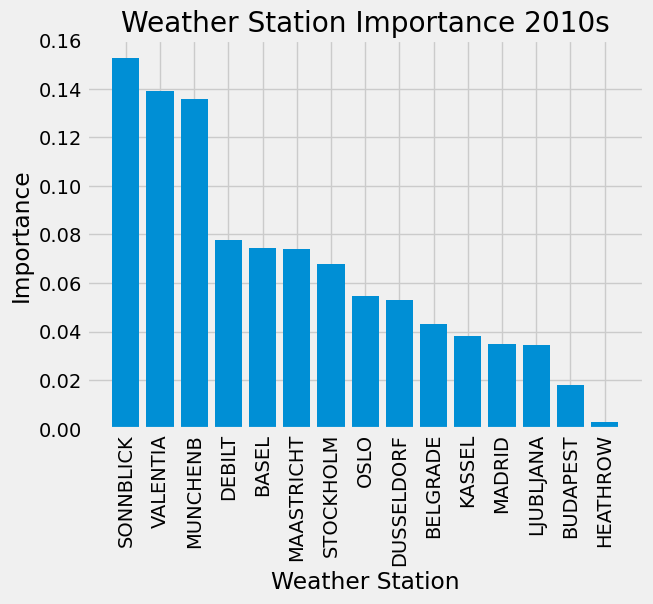

In [115]:
# Plot the results

%matplotlib inline

plt.style.use('fivethirtyeight')
print(unique_stations)

plt.bar(df_importance['Weather Station'], df_importance['Importance'], orientation = 'vertical')
plt.xticks(rotation='vertical')
plt.xlabel('Weather Station')
plt.ylabel('Importance')
plt.title('Weather Station Importance 2010s')

plt.show()

### 8. Valentia

Reducing columns down to just Valentia

In [132]:
# Create a list of the columns containing "Budapest" in their names

val_list = [col for col in df2010.columns if 'VALENTIA' in col]
val_list

['VALENTIA_cloud_cover',
 'VALENTIA_humidity',
 'VALENTIA_pressure',
 'VALENTIA_global_radiation',
 'VALENTIA_precipitation',
 'VALENTIA_sunshine',
 'VALENTIA_temp_mean',
 'VALENTIA_temp_min',
 'VALENTIA_temp_max']

In [134]:
val = df[val_list]
val

,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,5,0.88,1.0003,0.45,0.34,4.7,8.5,6.0,10.9
1,7,0.91,1.0007,0.25,0.84,0.7,8.9,5.6,12.1
2,7,0.91,1.0096,0.17,0.08,0.1,10.5,8.1,12.9
3,7,0.86,1.0184,0.13,0.98,0.0,7.4,7.3,10.6
4,3,0.80,1.0328,0.46,0.00,5.7,5.7,3.0,8.4
...,...,...,...,...,...,...,...,...,...
22945,5,0.82,1.0142,1.13,0.41,3.4,10.7,7.9,13.5
22946,5,0.82,1.0142,1.13,0.41,3.4,10.7,7.9,13.5
22947,5,0.82,1.0142,1.13,0.41,3.4,10.7,7.9,13.5
22948,5,0.82,1.0142,1.13,0.41,3.4,10.7,7.9,13.5


In [136]:
pleasant_val = pleasant['VALENTIA_pleasant_weather']
pleasant_val

0        0
1        0
2        0
3        0
4        0
        ..
22945    0
22946    0
22947    0
22948    0
22949    0
Name: VALENTIA_pleasant_weather, Length: 22950, dtype: int64

In [138]:
pleasant_val.shape

(22950,)

In [140]:
X2 = val

In [142]:
y2 = pleasant_val

In [144]:
# Turn X2 and y2 from df to arrays

X = np.array(X2)
y = np.array(y2)

In [146]:
X.shape

(22950, 9)

In [148]:
y.shape

(22950,)

In [150]:
# Split data into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 42)

In [152]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(17212, 9) (17212,)
(5738, 9) (5738,)


#### Grid Search

In [157]:
# Create a RF classifier

clf = RandomForestClassifier()

In [159]:
# Grid search cv
grid_space={'max_depth':[3,5,10,None],
              'n_estimators':[10,100,200],
              'max_features':[1,3,5,7],
              'min_samples_leaf':[1,2,3],
              'min_samples_split':[1,2,3]
           }

In [161]:
start = time.time()
grid = GridSearchCV(clf, param_grid=grid_space, cv=3, scoring='accuracy', verbose=3, n_jobs=-1)
model_grid = grid.fit(X_train, y_train)
print('Search took %s minutes' % ((time.time() - start)/60))

Fitting 3 folds for each of 432 candidates, totalling 1296 fits
Search took 2.440490182240804 minutes


In [163]:
# Print grid search results

print('Best GRID search hyperparameters are: '+str(model_grid.best_params_))
print('Best GRID search score is: '+str(model_grid.best_score_))

Best GRID search hyperparameters are: {'max_depth': 3, 'max_features': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best GRID search score is: 1.0


#### Random Search

In [166]:
# Define random search cv
rs_space = {
    'max_depth': list(np.arange(1, 10, step=1)) + [None],  
    'n_estimators': np.arange(100, 300, step=50),  
    'max_features': randint(2, 5),  
    'criterion': ['gini', 'entropy'],  
    'min_samples_leaf': randint(1, 4),  
    'min_samples_split': np.arange(2, 10, step=2)  
}

In [170]:
# Create a RF classifier

clf2= RandomForestClassifier()

In [172]:
start = time.time()
rf_random = RandomizedSearchCV(clf2, rs_space, n_iter=100, scoring='accuracy', verbose=3, n_jobs=-1, cv=5)
model_random = rf_random.fit(X_train, y_train)
print('Search took %s minutes' % ((time.time() - start)/60))

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Search took 2.4198814829190574 minutes


In [174]:
# Random random search results

print('Best RANDOM search hyperparameters are: '+str(model_random.best_params_))
print('Best RANDOM search score is: '+str(model_random.best_score_))

Best RANDOM search hyperparameters are: {'criterion': 'entropy', 'max_depth': 6, 'max_features': 4, 'min_samples_leaf': 3, 'min_samples_split': 4, 'n_estimators': 200}
Best RANDOM search score is: 0.9999419111240198


In [176]:
# Grid search results vs.

print('Best GRID search hyperparameters are: '+str(model_grid.best_params_))
print('Best GRID search score is: '+str(model_grid.best_score_))

# Random random search results

print('Best RANDOM search hyperparameters are: '+str(model_random.best_params_))
print('Best RANDOM search score is: '+str(model_random.best_score_))

Best GRID search hyperparameters are: {'max_depth': 3, 'max_features': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best GRID search score is: 1.0
Best RANDOM search hyperparameters are: {'criterion': 'entropy', 'max_depth': 6, 'max_features': 4, 'min_samples_leaf': 3, 'min_samples_split': 4, 'n_estimators': 200}
Best RANDOM search score is: 0.9999419111240198


In [178]:
# Create a RF classifier with the RANDOM search results
clf3 = RandomForestClassifier(n_estimators = 250, max_depth=7, max_features=2, min_samples_leaf=2, min_samples_split=2, criterion = 'gini')  
  
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf3.fit(X_train, y_train)

RandomForestClassifier(max_depth=7, max_features=2, min_samples_leaf=2,
                       n_estimators=250)

In [180]:
# performing predictions on the test dataset
y_pred = clf3.predict(X_test)
  
# using metrics module for accuracy calculation
print("Model Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Model Accuracy:  1.0


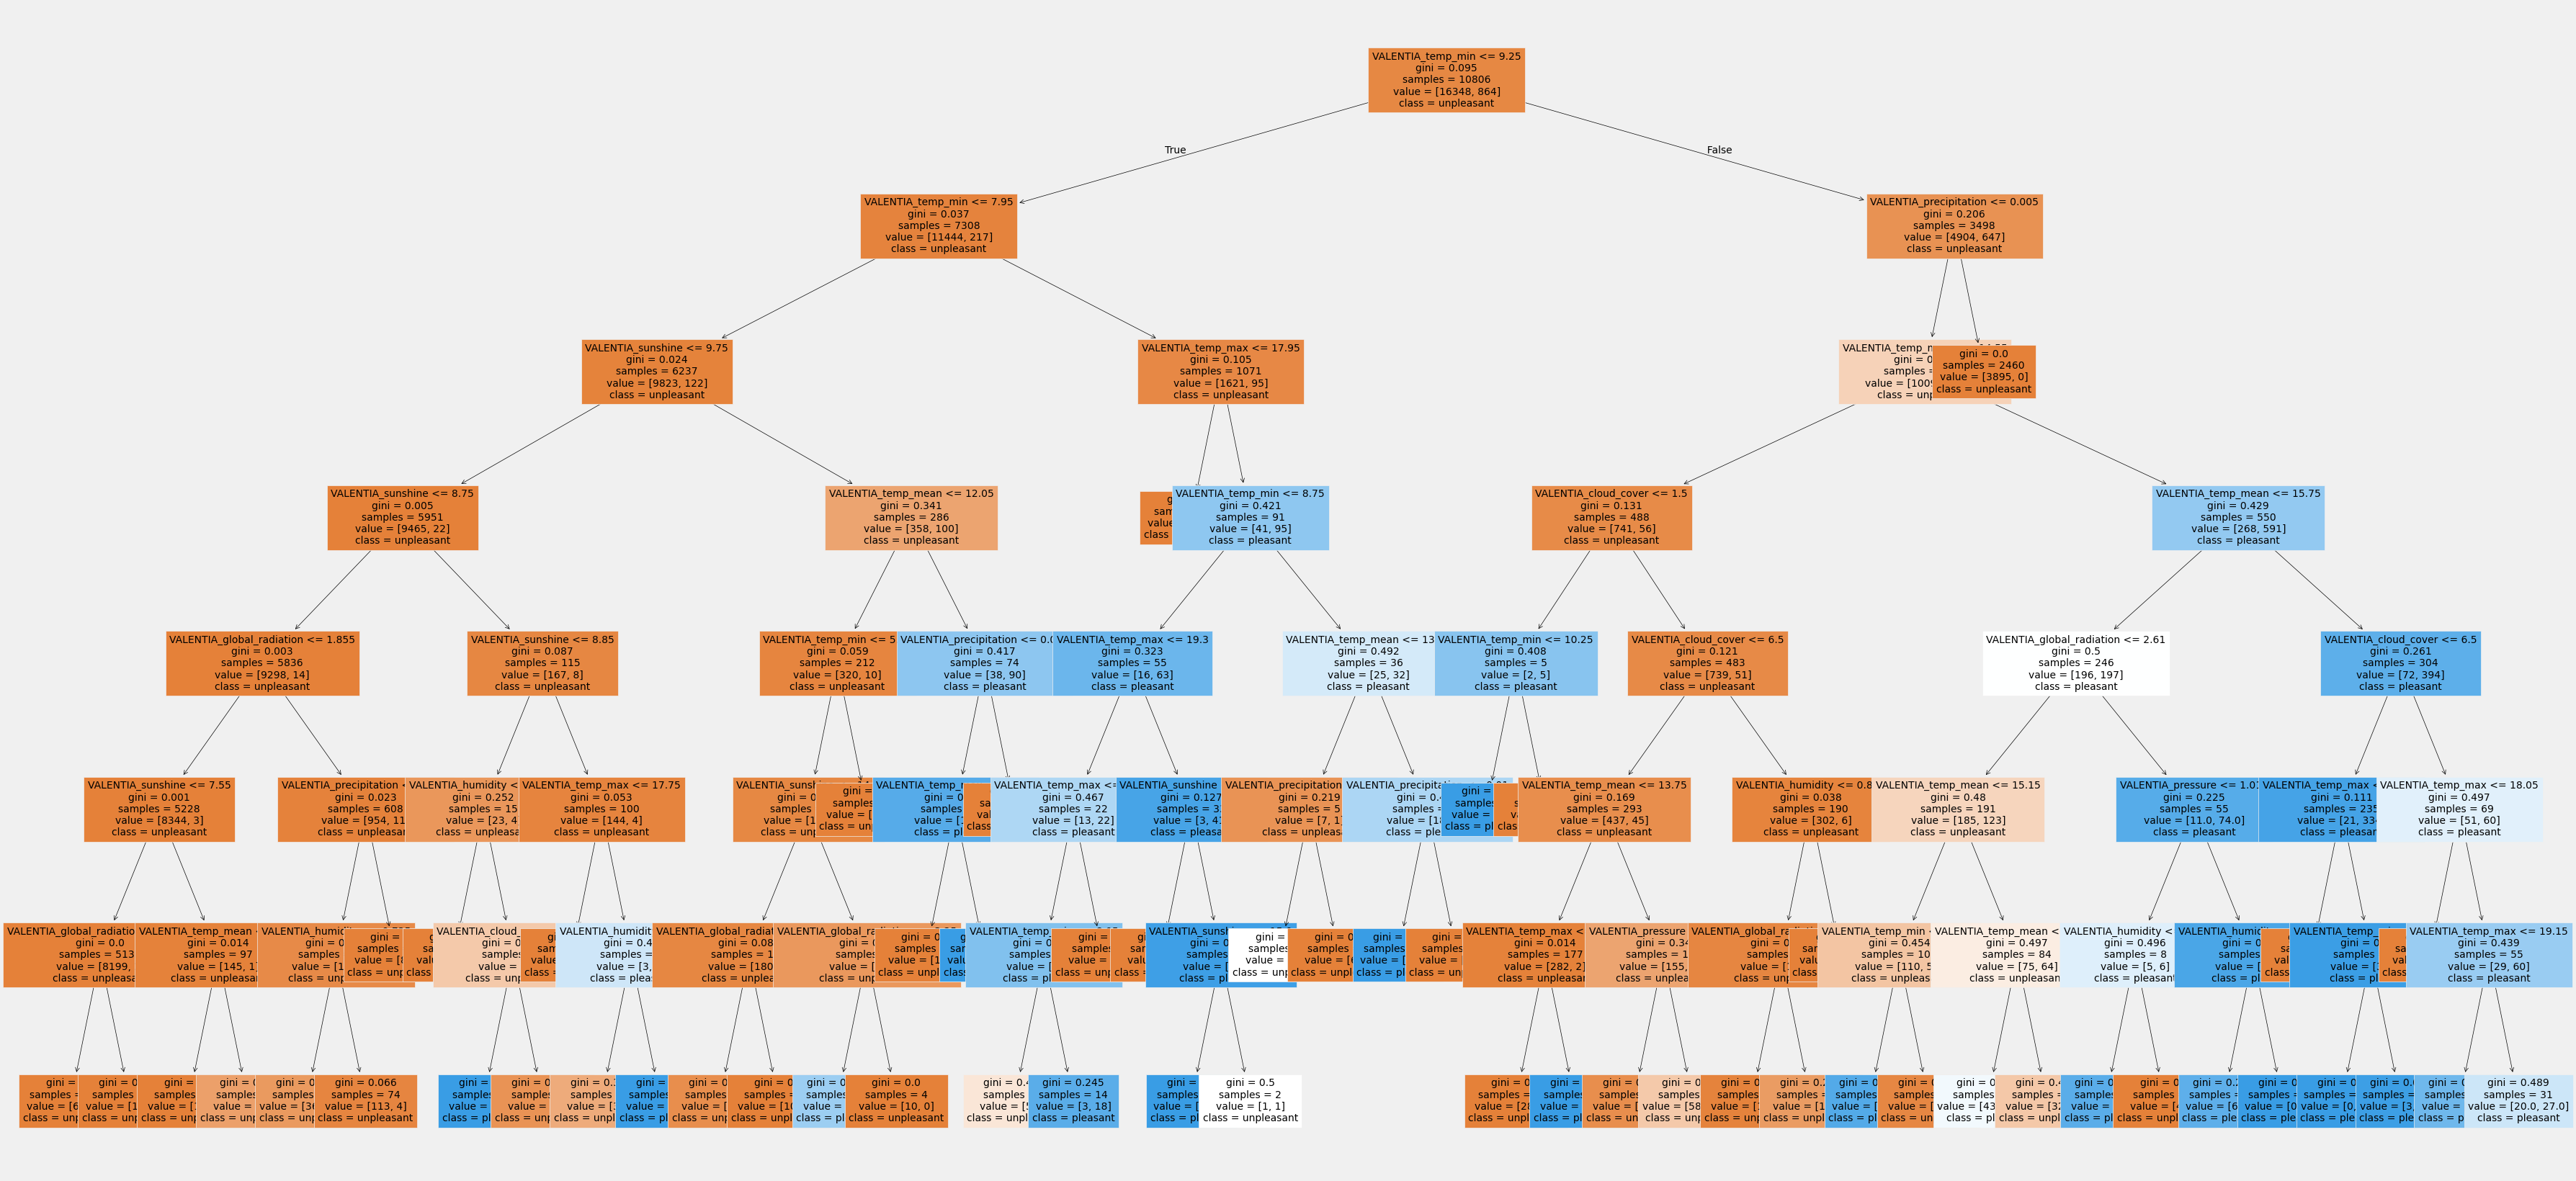

In [182]:
# Plot a tree from the selected random forest
# Class-names = {0:'Unpleasant Weather', 1:'Pleasant Weather'}

fig = plt.figure(figsize=(40,20))
plot_tree(clf3.estimators_[6], fontsize = 10, feature_names = val.columns, class_names=['unpleasant', 'pleasant'], filled=True)
plt.show();

In [184]:
# Retrieve feature importances from the trained model

newarray = clf3.feature_importances_
print(clf3.feature_importances_.shape)
newarray

(9,)


array([0.0441685 , 0.01045426, 0.03272814, 0.04969926, 0.22494842,
       0.07708807, 0.13001601, 0.03841375, 0.39248359])

In [186]:
val_list_again = [feature.replace('VALENTIA_', '') for feature in val_list]
val_list_again

['cloud_cover',
 'humidity',
 'pressure',
 'global_radiation',
 'precipitation',
 'sunshine',
 'temp_mean',
 'temp_min',
 'temp_max']

In [142]:
important = pd.Series(newarray, index = bud_list_again)
important

cloud_cover         0.010456
humidity            0.005159
pressure            0.003963
global_radiation    0.052752
precipitation       0.350005
sunshine            0.062478
temp_mean           0.132776
temp_min            0.060344
temp_max            0.322068
dtype: float64

['cloud_cover', 'humidity', 'pressure', 'global_radiation', 'precipitation', 'sunshine', 'temp_mean', 'temp_min', 'temp_max']


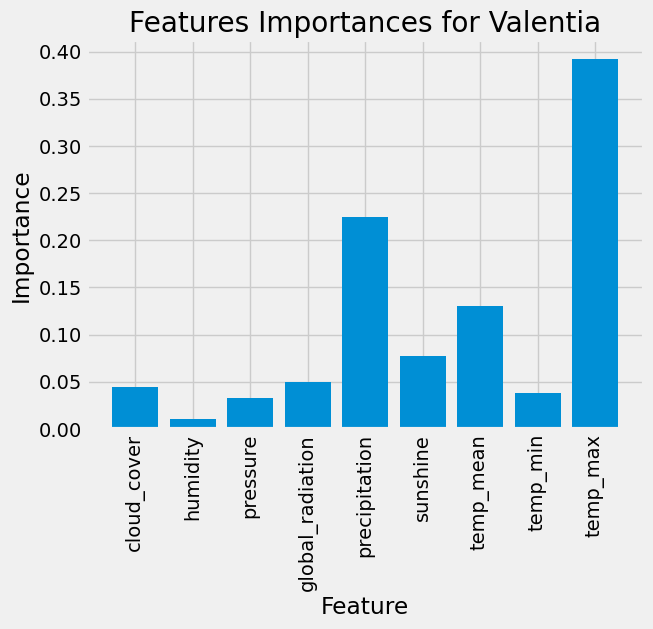

In [193]:
# Plot the results

%matplotlib inline

plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(newarray)))
print(val_list_again)

plt.bar(x_values, newarray, orientation = 'vertical')
plt.xticks(x_values, val_list_again, rotation='vertical')
plt.ylabel('Importance'); plt.xlabel('Feature'); plt.title('Features Importances for Valentia');

plt.show()